<a href="https://colab.research.google.com/github/Salma-Kassem/DeepLearning/blob/main/pretrained_effecientnetb0v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 71s 134ms/step - accuracy: 0.4627 - loss: 11.3172 - val_accuracy: 0.7617 - val_loss: 2.1297
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.7290 - loss: 2.1453 - val_accuracy: 0.7733 - val_loss: 1.8214
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 31s 86ms/step - accuracy: 0.7378 - loss: 1.9233 - val_accuracy: 0.7583 - val_loss: 1.7617
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.7357 - loss: 1.8738 - val_accuracy: 0.7542 - val_loss: 1.7072
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.7378 - loss: 1.8306 - val_accuracy: 0.7725 - val_loss: 1.6430
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.7430 - loss: 1.8205 - val_accuracy: 0.7625 - val_loss: 1.6472
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.7456 - loss: 1.7954 - val_accuracy: 0.7617 - val_loss: 1.6954
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.7356 - loss: 1.8223 

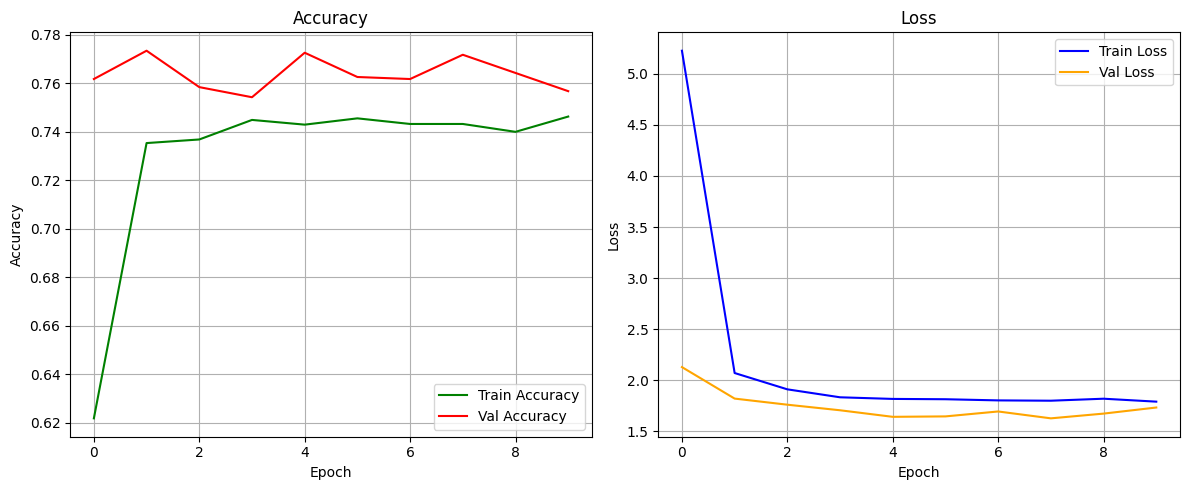

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetV2B0

# Load Stanford Dogs dataset
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:90%]', 'train[90%:]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Resize and normalize images
def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

AUTOTUNE = tf.data.AUTOTUNE
ds_train = ds_train.map(format_example, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds_val = ds_val.map(format_example, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds_test = ds_test.map(format_example, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Load pre-trained EfficientNetV2B0 without top layer
base_model = EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False  # Keep base model frozen

# Number of classes
num_classes = ds_info.features['label'].num_classes

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    Dense(num_classes, activation='softmax')
])
#1e-5 to 1e-4	To avoid destroying pre-trained weights with large updates

# Compile the model
model.compile(
    optimizer=Adam(),#You're not updating the pretrained layers, so you can afford a slightly higher learning rate. in fine tuning i should put the lr 10x smaller because if If too high, it will ruin the pretrained weights
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train only the top layers
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history)


Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 180s 417ms/step - accuracy: 0.2324 - loss: 12.0152 - val_accuracy: 0.6525 - val_loss: 3.0151
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 162s 341ms/step - accuracy: 0.4208 - loss: 3.4408 - val_accuracy: 0.6833 - val_loss: 2.5493
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 130s 353ms/step - accuracy: 0.4423 - loss: 3.2275 - val_accuracy: 0.7025 - val_loss: 2.3424
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 128s 346ms/step - accuracy: 0.4553 - loss: 3.1653 - val_accuracy: 0.7092 - val_loss: 2.2257
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 132s 360ms/step - accuracy: 0.4577 - loss: 3.0975 - val_accuracy: 0.7050 - val_loss: 2.1524
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 136s 341ms/step - accuracy: 0.4509 - loss: 3.0912 - val_accuracy: 0.7283 - val_loss: 2.0908
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 127s 343ms/step - accuracy: 0.4662 - loss: 3.0249 - val_accuracy: 0.7175 - val_loss: 2.0832
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 127s 345ms/step - accuracy: 0.4623 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        61,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,071,610 (30.79 MB)

 Trainable params: 717,432 (2.74 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 1,434,866 (5.47 MB)

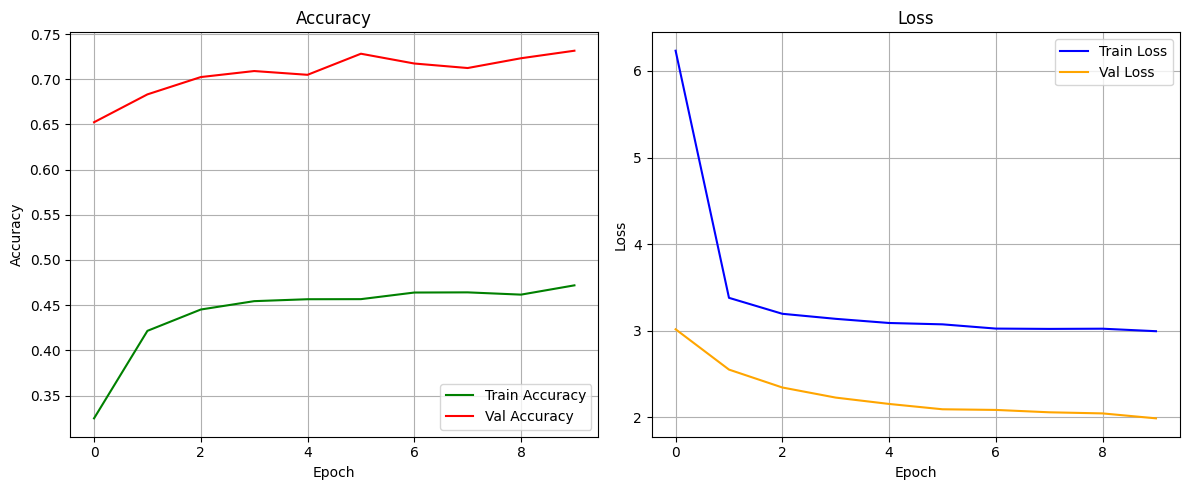

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetV2B0

# Automatically download and split the dataset
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:90%]', 'train[90%:]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Constants
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Data augmentation for training
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Resize, and augment training images
def format_train(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = data_augmentation(image)
    return image, label

# Resize validation/test images
def format_val_test(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

# Prepare datasets
ds_train = ds_train.map(format_train, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds_val = ds_val.map(format_val_test, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds_test = ds_test.map(format_val_test, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Load EfficientNetV2B0 base model without top layer
base_model = EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False  #Keep the base model frozen (no fine-tuning)

# Number of classes
num_classes = ds_info.features['label'].num_classes

# Build the model
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.05)),#ReLU introduces non-linear behavior, which helps the network learn complex patterns beyond simple linear combinations of inputs.
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(),  # Default learning rate 0.001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model (only the top layers)
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Print model summary
model.summary()

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history)
#training accuracy might be lower with augmentation because the model must learn more robust features.

#Validation/test accuracy is often higher with augmentation, because the model generalizes better to new, unseen data.